In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
data=pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [ ]:

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Annual Income ($),Age,Product line,Unit price,Quantity,Tax 5%,Total
0,750-67-8428,A,Yangon,Member,Female,15000,19,Health and beauty,74.69,7.0,26.1415,548.9715
1,226-31-3081,C,Naypyitaw,Normal,Female,35000,21,Electronic accessories,15.28,5.0,3.8200,80.2200
2,631-41-3108,A,Yangon,Normal,Male,86000,20,Home and lifestyle,46.33,7.0,16.2155,340.5255
3,123-19-1176,A,Yangon,Member,Male,59000,23,Health and beauty,58.22,8.0,23.2880,489.0480
4,373-73-7910,A,Yangon,Normal,Male,38000,31,Sports and travel,86.31,7.0,30.2085,634.3785


In [ ]:
#To check for missing values
data.isnull().sum()

Invoice ID           1000
Branch               1000
City                 1000
Customer type        1000
Gender               1000
Annual Income ($)       0
Age                     0
Product line         1000
Unit price           1000
Quantity             1000
Tax 5%               1000
Total                1000
dtype: int64

In [ ]:

# Fill missing values with the mean
data_filled = data.fillna(data.mean())
data_filled.head()

<ipython-input-7-7d45230dda35>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = data.fillna(data.mean())


,Invoice ID,Branch,City,Customer type,Gender,Annual Income ($),Age,Product line,Unit price,Quantity,Tax 5%,Total
0,750-67-8428,A,Yangon,Member,Female,15000,19,Health and beauty,74.69,7.0,26.1415,548.9715
1,226-31-3081,C,Naypyitaw,Normal,Female,35000,21,Electronic accessories,15.28,5.0,3.8200,80.2200
2,631-41-3108,A,Yangon,Normal,Male,86000,20,Home and lifestyle,46.33,7.0,16.2155,340.5255
3,123-19-1176,A,Yangon,Member,Male,59000,23,Health and beauty,58.22,8.0,23.2880,489.0480
4,373-73-7910,A,Yangon,Normal,Male,38000,31,Sports and travel,86.31,7.0,30.2085,634.3785


In [ ]:


# Define age bins and labels
bins = [0, 18, 35, 60, float('inf')]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']

In [ ]:

# Create a new column with binned age categories
data['Age_Category'] = pd.cut(data['Age'], bins=bins, labels=labels)

In [ ]:


data

,Invoice ID,Branch,City,Customer type,Gender,Annual Income ($),Age,Product line,Unit price,Quantity,Tax 5%,Total,Age_Category
0,750-67-8428,A,Yangon,Member,Female,15000,19,Health and beauty,74.69,7.0,26.1415,548.9715,Young Adult
1,226-31-3081,C,Naypyitaw,Normal,Female,35000,21,Electronic accessories,15.28,5.0,3.8200,80.2200,Young Adult
2,631-41-3108,A,Yangon,Normal,Male,86000,20,Home and lifestyle,46.33,7.0,16.2155,340.5255,Young Adult
3,123-19-1176,A,Yangon,Member,Male,59000,23,Health and beauty,58.22,8.0,23.2880,489.0480,Young Adult
4,373-73-7910,A,Yangon,Normal,Male,38000,31,Sports and travel,86.31,7.0,30.2085,634.3785,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,NaN,NaN,NaN,NaN,184387,71,NaN,NaN,NaN,NaN,NaN,Senior
1996,NaN,NaN,NaN,NaN,NaN,73158,91,NaN,NaN,NaN,NaN,NaN,Senior
1997,NaN,NaN,NaN,NaN,NaN,90961,87,NaN,NaN,NaN,NaN,NaN,Senior
1998,NaN,NaN,NaN,NaN,NaN,182109,77,NaN,NaN,NaN,NaN,NaN,Senior


In [ ]:

bin_counts=data['Age_Category'].value_counts()
bin_counts

Senior         749
Adult          504
Young Adult    392
Child          331
Name: Age_Category, dtype: int64

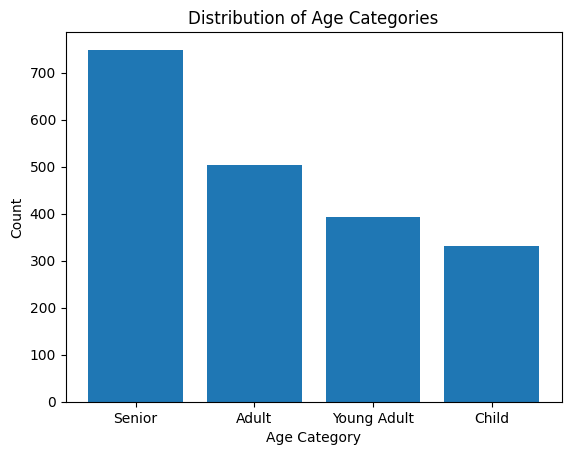

In [ ]:

# Create a bar plot
#The value_counts() function is used to count the occurrences of each age category (binned value) in the DataFrame. Then, a bar plot is created using plt.bar().

plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')
plt.show()

In [ ]:
encoded_data=pd.get_dummies(data,columns=['Gender', 'Product line'])
encoded_data


,Invoice ID,Branch,City,Customer type,Annual Income ($),Age,Unit price,Quantity,Tax 5%,Total,Age_Category,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,750-67-8428,A,Yangon,Member,15000,19,74.69,7.0,26.1415,548.9715,Young Adult,1,0,0,0,0,1,0,0
1,226-31-3081,C,Naypyitaw,Normal,35000,21,15.28,5.0,3.8200,80.2200,Young Adult,1,0,1,0,0,0,0,0
2,631-41-3108,A,Yangon,Normal,86000,20,46.33,7.0,16.2155,340.5255,Young Adult,0,1,0,0,0,0,1,0
3,123-19-1176,A,Yangon,Member,59000,23,58.22,8.0,23.2880,489.0480,Young Adult,0,1,0,0,0,1,0,0
4,373-73-7910,A,Yangon,Normal,38000,31,86.31,7.0,30.2085,634.3785,Young Adult,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,NaN,NaN,NaN,184387,71,NaN,NaN,NaN,NaN,Senior,0,0,0,0,0,0,0,0
1996,NaN,NaN,NaN,NaN,73158,91,NaN,NaN,NaN,NaN,Senior,0,0,0,0,0,0,0,0
1997,NaN,NaN,NaN,NaN,90961,87,NaN,NaN,NaN,NaN,Senior,0,0,0,0,0,0,0,0
1998,NaN,NaN,NaN,NaN,182109,77,NaN,NaN,NaN,NaN,Senior,0,0,0,0,0,0,0,0


In [ ]:

corr_matrix = data.corr()
corr_matrix['Age'].sort_values(ascending=False)

<ipython-input-14-09d1e346ad4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Age                  1.000000
Annual Income ($)    0.021378
Unit price           0.013838
Total                0.000207
Tax 5%               0.000207
Quantity            -0.009313
Name: Age, dtype: float64

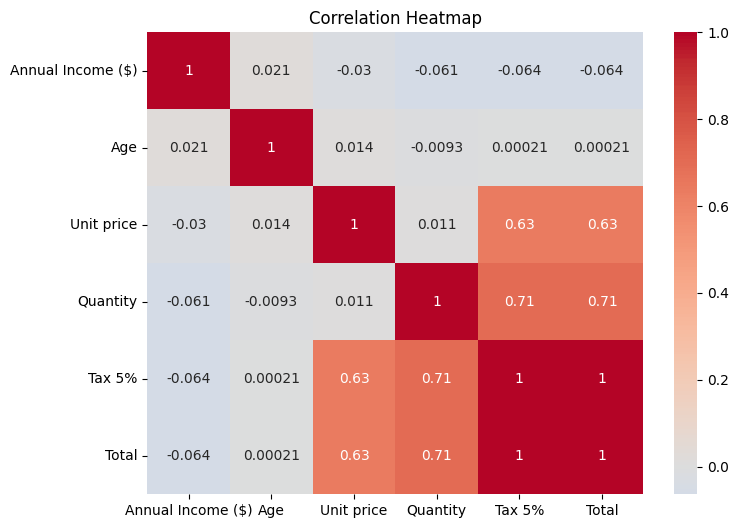

In [ ]:

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:

from scipy import stats

# Perform independent t-test
age=data['Age']
anninc=data['Annual Income ($)']
t_statistic, p_value = stats.ttest_ind(age, anninc)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between age and annual income.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between age and annual income.")

T-statistic: -108.21900367604844
P-value: 0.0
Reject the null hypothesis: There is a significant difference between age and annual income.


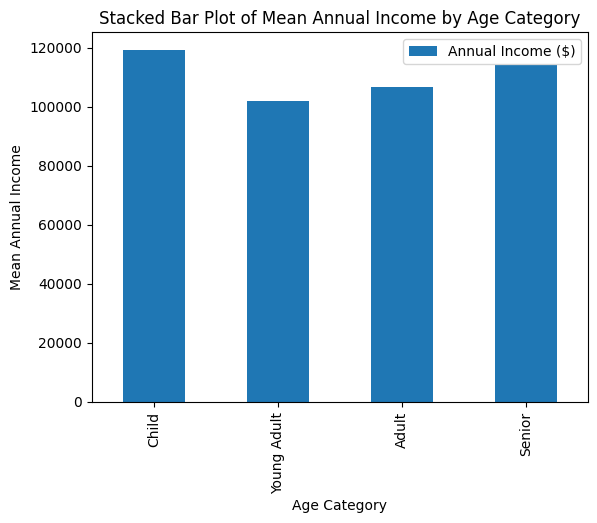

In [ ]:
# Group data by age category and calculate mean annual income
grouped_data = data.groupby('Age_Category')['Annual Income ($)'].mean()

# Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Age Category')
plt.ylabel('Mean Annual Income')
plt.title('Stacked Bar Plot of Mean Annual Income by Age Category')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(data['Quantity'], data['Total'])

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Check for significance at a specific significance level (e.g., 0.05)
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between city and customer type.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between city and customer type.")

Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
 [ 7.  5.  7. ... nan nan nan]
Fail to reject the null hypothesis: There is no significant relationship between city and customer type.


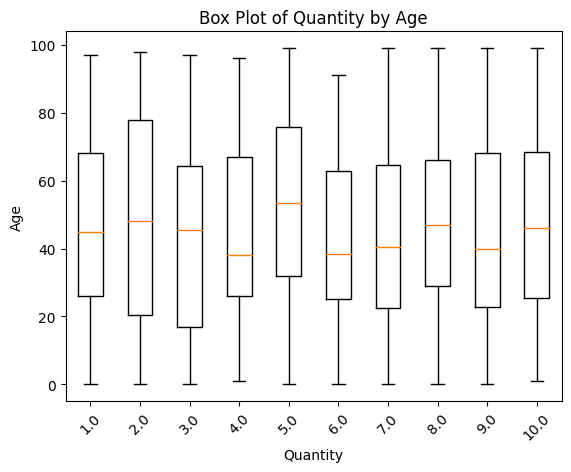

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'Product' and calculate median quantities
grouped_data = data.groupby('Quantity')['Age'].median()

# Create a box plot using matplotlib
plt.boxplot([data[data['Quantity'] == product]['Age'] for product in grouped_data.index], labels=grouped_data.index)

# Set plot labels and title
plt.title('Box Plot of Quantity by Age')
plt.xlabel('Quantity')
plt.ylabel('Age')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()
